In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter 

In [2]:
# Load Data
df = pd.read_excel("../datasets/dataset.xlsx",dtype={'CustomerID': str}, parse_dates=["InvoiceDate"])

In [3]:
# Sort by CustomerID and InvoiceDate
df = df.sort_values(by=["CustomerID", "InvoiceDate"])

# Compute First and Last Purchase Date for each Customer
customer_lifetime = df.groupby("CustomerID").agg(
    first_purchase=("InvoiceDate", "min"),
    last_purchase=("InvoiceDate", "max")
).reset_index()

display(customer_lifetime)

,CustomerID,first_purchase,last_purchase
0,12346,2011-01-18 10:01:00,2011-01-18 10:17:00
1,12347,2010-12-07 14:57:00,2011-12-07 15:52:00
2,12348,2010-12-16 19:09:00,2011-09-25 13:13:00
3,12349,2011-11-21 09:51:00,2011-11-21 09:51:00
4,12350,2011-02-02 16:01:00,2011-02-02 16:01:00
...,...,...,...
4367,18280,2011-03-07 09:52:00,2011-03-07 09:52:00
4368,18281,2011-06-12 10:53:00,2011-06-12 10:53:00
4369,18282,2011-08-05 13:35:00,2011-12-02 11:43:00
4370,18283,2011-01-06 14:14:00,2011-12-06 12:02:00


In [4]:
df["InvoiceDate"].max() - pd.Timedelta(days=180)

Timestamp('2011-06-12 12:50:00')

In [7]:
# Calculate Survival Time (Days between first and last purchase)
customer_lifetime["survival_time"] = (customer_lifetime["last_purchase"] - customer_lifetime["first_purchase"]).dt.days

# Define Churn Event (if last purchase was more than 180 days ago, assume churn)
customer_lifetime["event"] = (customer_lifetime["survival_time"] < 200).astype(int)

# Display processed data
display(customer_lifetime.head(20))

,CustomerID,first_purchase,last_purchase,survival_time,event
0,12346,2011-01-18 10:01:00,2011-01-18 10:17:00,0,1
1,12347,2010-12-07 14:57:00,2011-12-07 15:52:00,365,0
2,12348,2010-12-16 19:09:00,2011-09-25 13:13:00,282,0
3,12349,2011-11-21 09:51:00,2011-11-21 09:51:00,0,1
4,12350,2011-02-02 16:01:00,2011-02-02 16:01:00,0,1
5,12352,2011-02-16 12:33:00,2011-11-03 14:37:00,260,0
6,12353,2011-05-19 17:47:00,2011-05-19 17:47:00,0,1
7,12354,2011-04-21 13:11:00,2011-04-21 13:11:00,0,1
8,12355,2011-05-09 13:49:00,2011-05-09 13:49:00,0,1
9,12356,2011-01-18 09:50:00,2011-11-17 08:40:00,302,0


Text(0, 0.5, 'Survival probability')

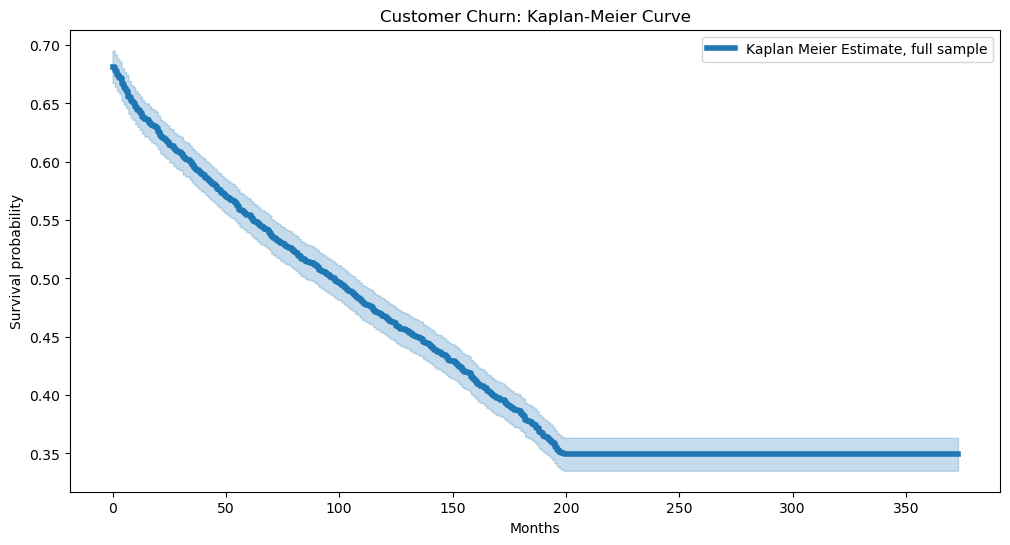

In [8]:
kmf = KaplanMeierFitter()

kmf.fit(customer_lifetime.survival_time, customer_lifetime.event, label = 'Kaplan Meier Estimate, full sample')

kmf.plot(linewidth=4, figsize=(12, 6))
plt.title('Customer Churn: Kaplan-Meier Curve')
plt.xlabel('Months')
plt.ylabel('Survival probability')